In [3]:
import pandas as pd
URL='https://drive.google.com/file/d/1xsLlG0OH31huDQmLrqaA2TQEGGUu1thl/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X=df.iloc[ : , 2:4 ]
y=df.iloc[ : , 4 ]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,
test_size=0.25, random_state=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
classifier = DecisionTreeClassifier(criterion='entropy')
gini_clf = DecisionTreeClassifier(criterion='gini')

In [17]:
classifier.fit(X_train, y_train)
gini_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = classifier.predict(X_test)
y_pred_gini = gini_clf.predict(X_test)

/home/erkin98/miniconda3/envs/unec/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/erkin98/miniconda3/envs/unec/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


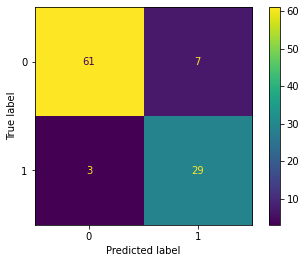

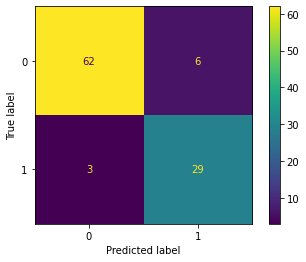

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)
plot_confusion_matrix(gini_clf, X_test, y_test);

In [24]:
from sklearn.metrics import classification_report
print('Entropy:')
print(classification_report(y_test, y_pred))
print('Gini:')
print(classification_report(y_test, y_pred_gini))



Entropy:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        68
           1       0.81      0.91      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.90      0.89       100
weighted avg       0.91      0.90      0.90       100

Gini:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [25]:
from sklearn.metrics import accuracy_score,log_loss,roc_auc_score,f1_score,precision_score,recall_score
for metric_name in [accuracy_score,log_loss,roc_auc_score,f1_score,precision_score,recall_score]:
    metric = metric_name(y_test, y_pred)
    metric_gini = metric_name(y_test, y_pred_gini)
    
    display(f'Entropy - {metric_name.__name__} - {metric}')
    display(f'Gini - {metric_name.__name__} - {metric_gini}')
    


'Entropy - accuracy_score - 0.9'

'Gini - accuracy_score - 0.91'

'Entropy - log_loss - 3.4539336113111823'

'Gini - log_loss - 3.1085378513877737'

'Entropy - roc_auc_score - 0.901654411764706'

'Gini - roc_auc_score - 0.9090073529411765'

'Entropy - f1_score - 0.8529411764705882'

'Gini - f1_score - 0.8656716417910447'

'Entropy - precision_score - 0.8055555555555556'

'Gini - precision_score - 0.8285714285714286'

'Entropy - recall_score - 0.90625'

'Gini - recall_score - 0.90625'

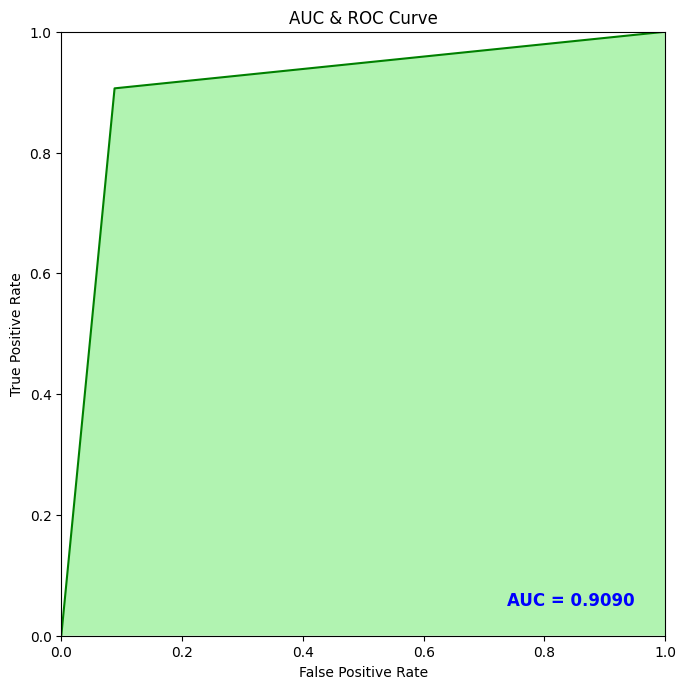

In [29]:
import sklearn.metrics 
auc_gini = sklearn.metrics.roc_auc_score(y_test, y_pred_gini)
import matplotlib.pyplot as plt

false_positive_rate_gini, true_positive_rate_gini, thresolds_gini = sklearn.metrics.roc_curve(y_test, y_pred_gini)


plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate_gini, true_positive_rate_gini, 'g')
plt.fill_between(false_positive_rate_gini, true_positive_rate_gini, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc_gini, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

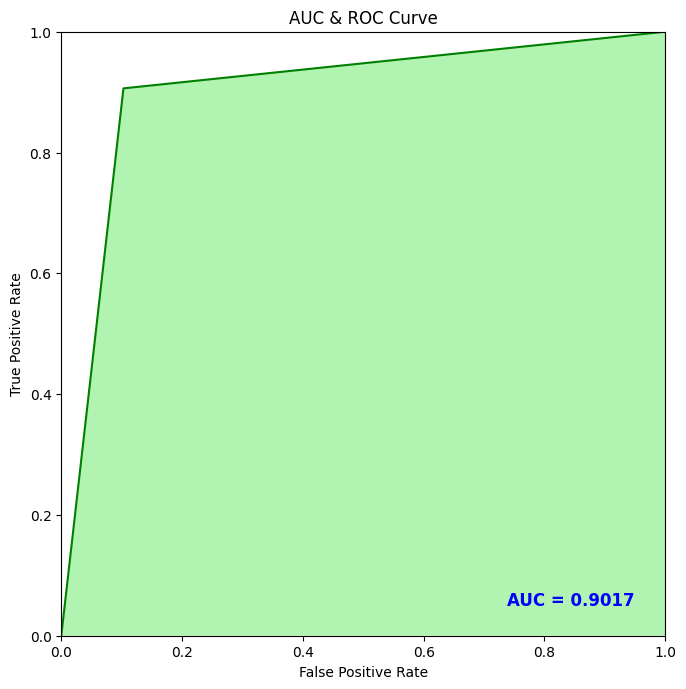

In [28]:
import sklearn.metrics 
auc = sklearn.metrics.roc_auc_score(y_test, y_pred)
auc_gini = sklearn.metrics.roc_auc_score(y_test, y_pred_gini)
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresolds = sklearn.metrics.roc_curve(y_test, y_pred)
false_positive_rate_gini, true_positive_rate_gini, thresolds_gini = sklearn.metrics.roc_curve(y_test, y_pred_gini)


plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()